# Comparison of Fine Fuel Moisture Content functions

In [1]:
from src.pyropy import weatherdata as ppw
from src.pyropy import firebehaviour as ppf
from src.pyropy import spreadmodels as pps
weather = ppw.gridded_to_df('examples/data/weather_gridded_in.csv')
incident = ppf.Incident(weather)
incident.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7    17   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7    15   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7    14   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7    17   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7    24   

   gfdi  
0     1  
1     1  
2     1  
3     2  
4     4  


In [2]:
incident.df['mc_v'] = pps.get_mc_v(incident.df)
incident.df['mc_g'] = pps.get_mc_g(incident.df)
incident.df['mc_m'] = pps.get_mc_m(incident.df)
incident.print(head=True)


            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7    17   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7    15   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7    14   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7    17   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7    24   

   gfdi     mc_v    mc_g    mc_m  
0     1  6.71723  8.0201  7.4636  
1     1  6.77132  8.1092  7.5152  
2     1  7.38899  8.6939  7.9184  
3     2  7.55270  8.7566  7.9856  
4     4  7.00601  7.9815  7.5180  


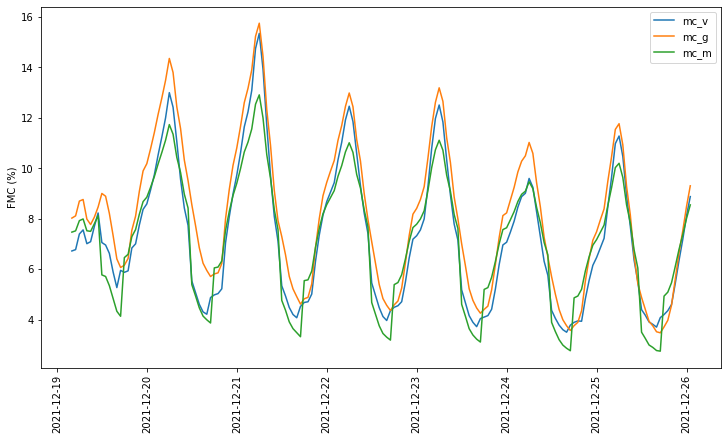

In [4]:
import matplotlib.pyplot as plt
fig, (ax_mc) = plt.subplots(1,1, sharex=True,constrained_layout=True, figsize=(10,6))

ax_dict = {
    'FMC (%)': [ax_mc, 'mc_v', 'mc_g', 'mc_m'],
}

for label, val in ax_dict.items():
    for col in val[1:]:
        val[0].plot(incident.df['date_time'],incident.df[col], label=col)
    val[0].set_ylabel(label)

ax_mc.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()